<a href="https://colab.research.google.com/github/NoorFatimaMemon/GRIP-Exploratory-Data-Analysis-Retail/blob/main/GRIP_Task_3_Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Rotational Internship Program (GRIP)**
## **Data Science & Business Analytics Intern**
### Task 03: Exploratory Data Analysis Retail. (**By Noor Fatima Memon**)

#### **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### **Data Loading**

In [ ]:
# Load the dataset
file_path = "/content/gdrive/MyDrive/Colab Notebooks/SampleSuperstore.csv"
df_SampleSuperstore = pd.read_csv(file_path)
df_SampleSuperstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### **Analyze & visualize the dataset**

In [ ]:
df_SampleSuperstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# statistical analysis of the data
df_SampleSuperstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


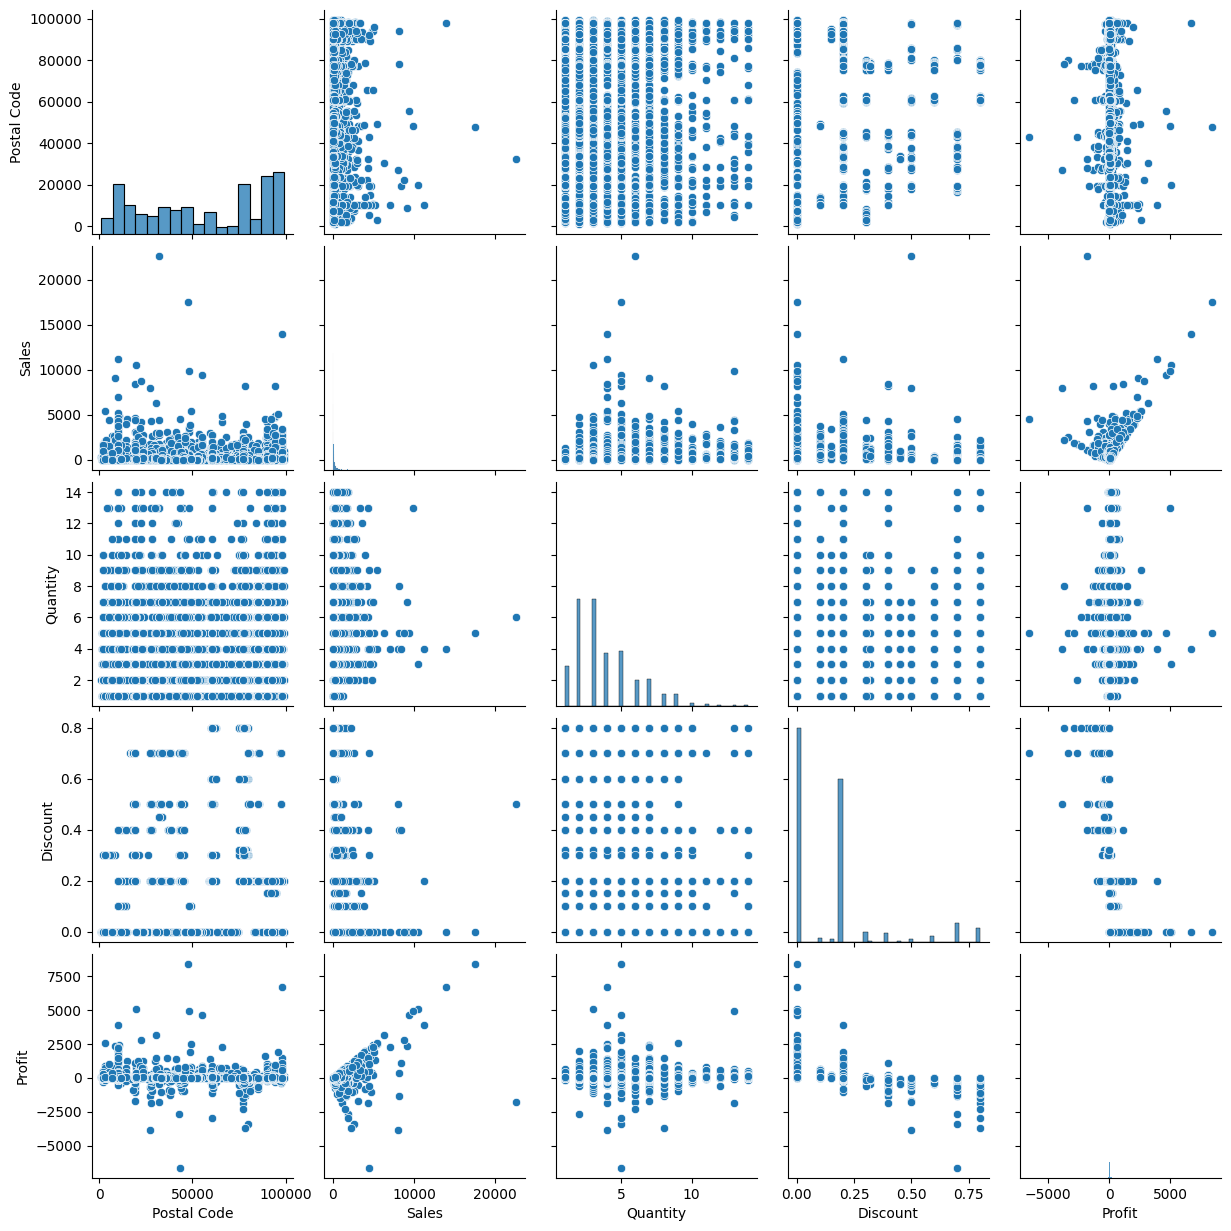

In [ ]:
# POC for Visualization
# dataset Visualization
sns.pairplot(df_SampleSuperstore)

#### **In the context of visualizing data based on profiles, our primary emphasis will be on profit.**

#### **Q1: What shipping method results in the greatest profit?**

In [ ]:
df_SampleSuperstore['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
Ship_Mode_data_operation = pd.DataFrame(df_SampleSuperstore.groupby(['Ship Mode'])['Profit'].sum()).reset_index()
Ship_Mode_data_operation

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


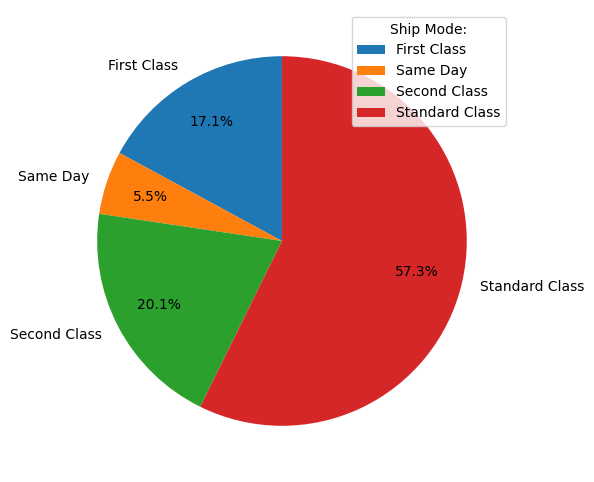

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(Ship_Mode_data_operation["Profit"], labels=Ship_Mode_data_operation["Ship Mode"], autopct='%1.1f%%', pctdistance=0.75, startangle=90)
plt.legend(title = "Ship Mode:")
plt.show()

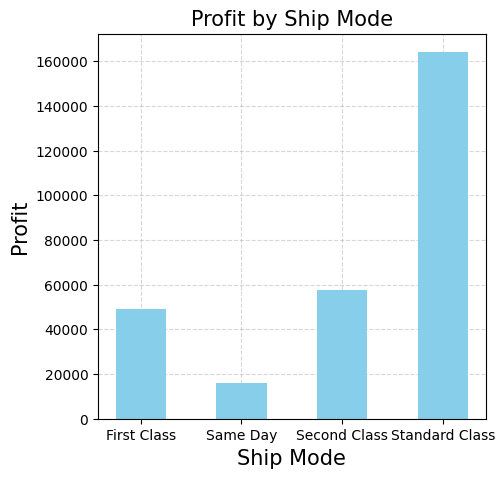

In [ ]:
plt.figure(figsize=(5, 5))
plt.grid(zorder=1, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.bar(Ship_Mode_data_operation["Ship Mode"], Ship_Mode_data_operation["Profit"], color="skyblue", width = 0.5)
plt.xlabel("Ship Mode", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title('Profit by Ship Mode', fontsize=15)
plt.show()

#### **Ans#01: Standard Class shipping method results in the greatest profit.**

#### **Q2: Which customer segment yields the most significant profit and sales?**
#### **Q3: Which region and state yields highest profit and sales?**

In [ ]:
df_SampleSuperstore['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
segment_profit_sales = pd.DataFrame(df_SampleSuperstore.groupby(['Segment'])[['Profit','Sales']].sum())
segment_profit_sales

,Profit,Sales
Segment,,
Consumer,134119.2092,1.161401e+06
Corporate,91979.1340,7.061464e+05
Home Office,60298.6785,4.296531e+05


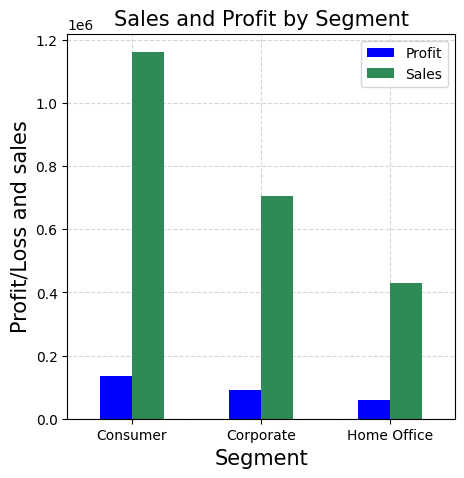

In [ ]:
segment_profit_sales.plot(kind='bar', figsize=(5, 5), color=['blue', 'seagreen']).set_xticklabels(segment_profit_sales.index, rotation=0)
plt.grid(zorder=1, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xlabel("Segment", fontsize=15)
plt.ylabel("Profit/Loss and sales", fontsize=15)
plt.title('Sales and Profit by Segment', fontsize=15)
plt.show()

In [ ]:
df_SampleSuperstore['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
Region_profit_sales = pd.DataFrame(df_SampleSuperstore.groupby(['Region'])[['Profit','Sales']].sum())
Region_profit_sales

,Profit,Sales
Region,,
Central,39706.3625,501239.8908
East,91522.7800,678781.2400
South,46749.4303,391721.9050
West,108418.4489,725457.8245


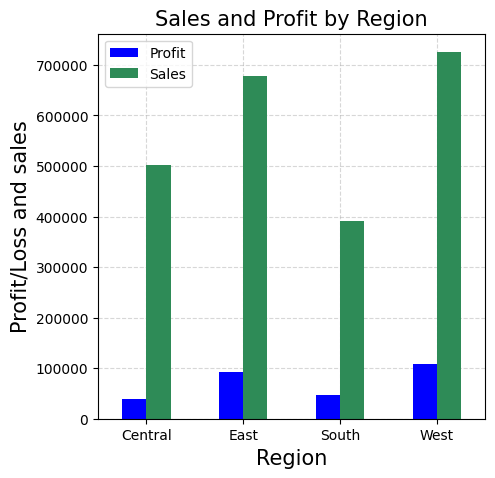

In [ ]:
Region_profit_sales.plot(kind='bar', figsize=(5, 5), color=['blue', 'seagreen']).set_xticklabels(Region_profit_sales.index, rotation=0)
plt.grid(zorder=1, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Profit/Loss and sales", fontsize=15)
plt.title('Sales and Profit by Region', fontsize=15)
plt.show()

In [ ]:
State_profit_sales = pd.DataFrame(df_SampleSuperstore.groupby(['State'])[['Profit','Sales']].sum())

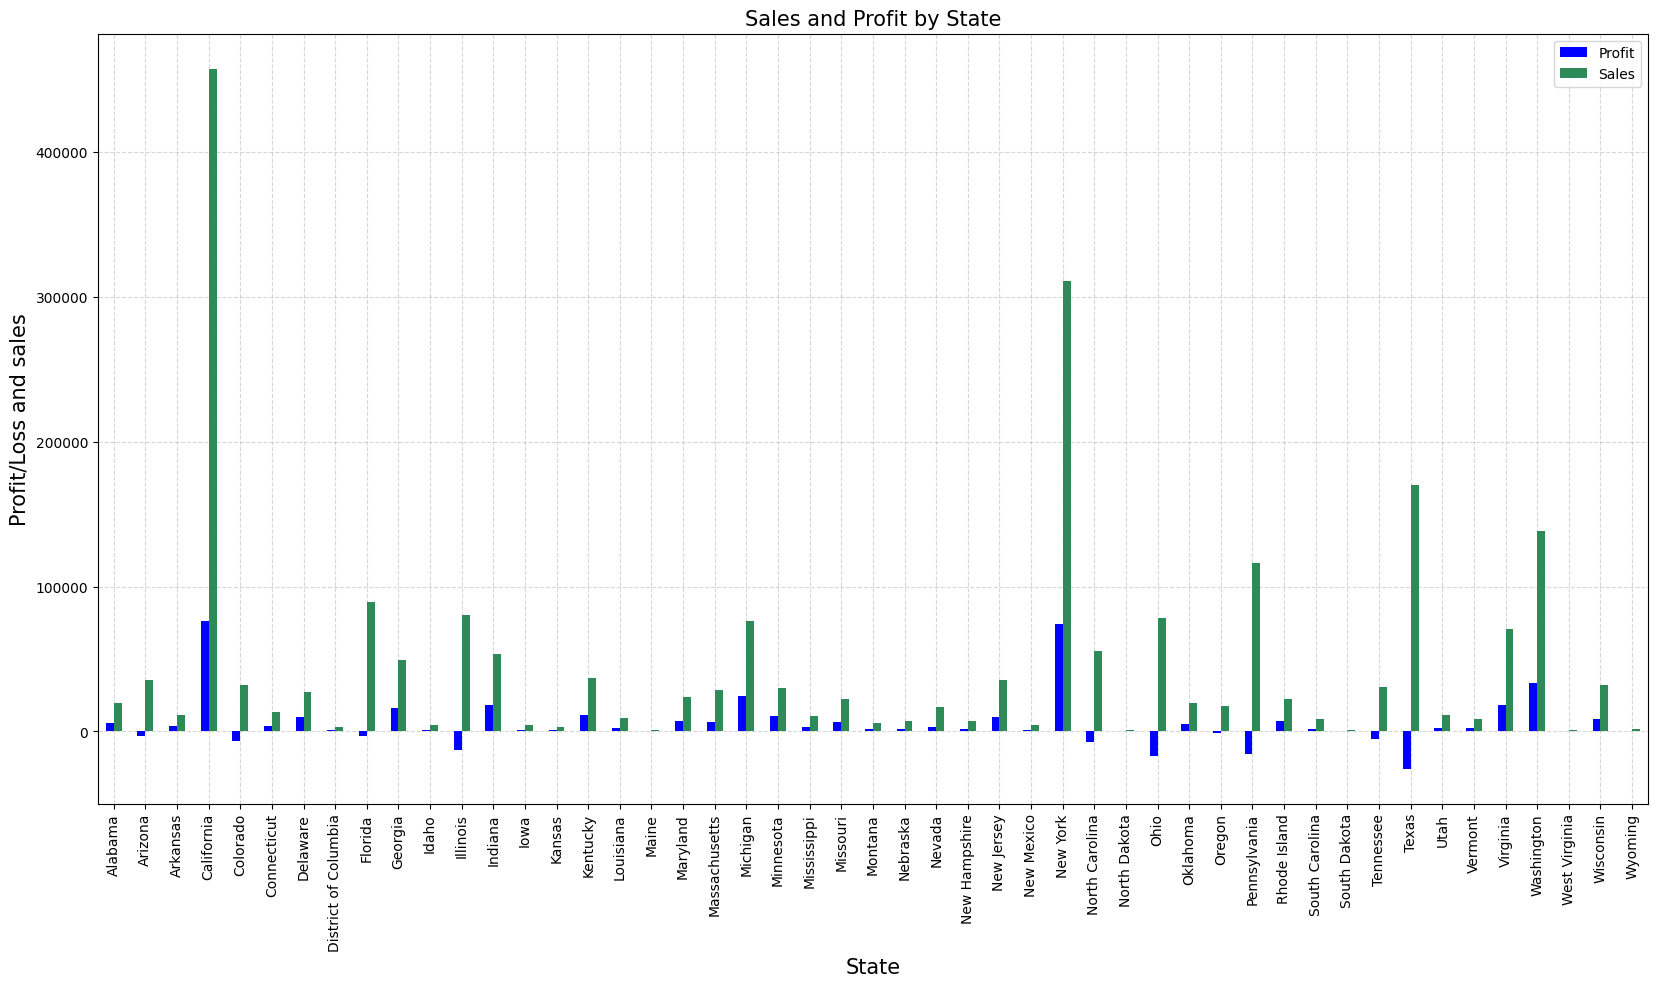

In [ ]:
State_profit_sales.plot(kind='bar', figsize=(20,10), color=['blue', 'seagreen']).set_xticklabels(State_profit_sales.index, rotation=90)
plt.grid(zorder=1, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xlabel("State", fontsize=15)
plt.ylabel("Profit/Loss and sales", fontsize=15)
plt.title('Sales and Profit by State', fontsize=15)
plt.show()

#### **Ans#02: The consumer segment achieves the highest profit and sales, while the Home Office segment has the lowest profit and sales.**

#### **Ans#03:**

1.   **The West region records the highest profit and sales, while the South region shows the lowest profit and sales.**
2.   **High profit is for california and new york and loss is for texas, pennsylvania, and Ohio.**

#### **Q4: Which state has maximum and minimum buyers?**

In [ ]:
df_SampleSuperstore['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

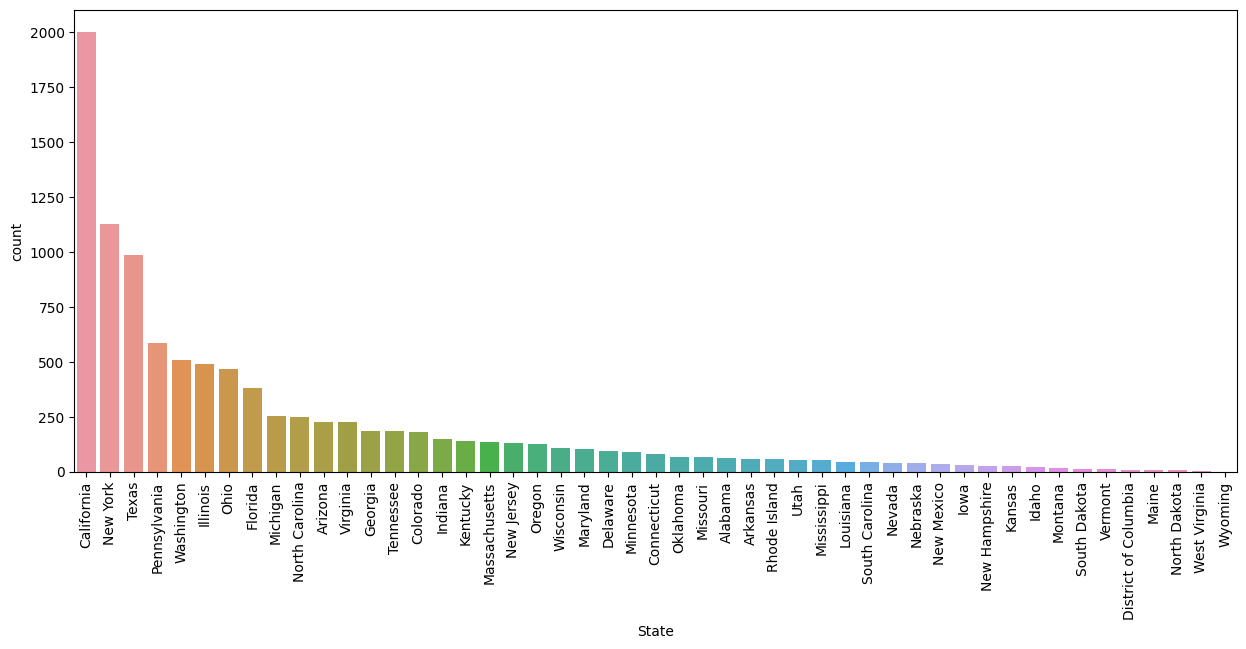

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='State',data=df_SampleSuperstore,order=df_SampleSuperstore['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### **Ans#04: Highest number of buyers are from California and New York.**

#### **Q5: As a business manager, try to find out the weak areas where you can work to make more profit?**

***For this purpose, we need to find which Category and Sub-Category has less profit***

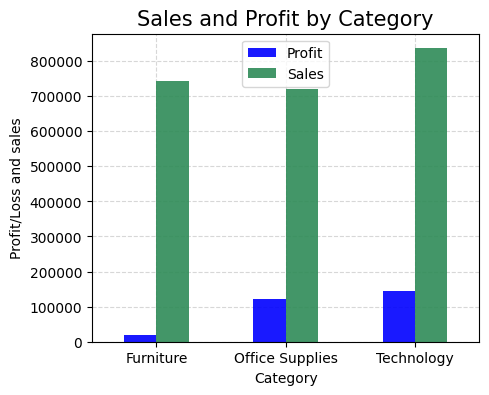

In [ ]:
df_SampleSuperstore.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['blue','seagreen'], alpha=0.9, figsize=(5,4))
plt.grid(zorder=1, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xticks(rotation=0)
plt.ylabel('Profit/Loss and sales')
plt.title('Sales and Profit by Category', fontsize=15)
plt.show()

In [ ]:
SubCategory_profit_sales = pd.DataFrame(df_SampleSuperstore.groupby(['Sub-Category'])[['Profit','Sales']].sum())

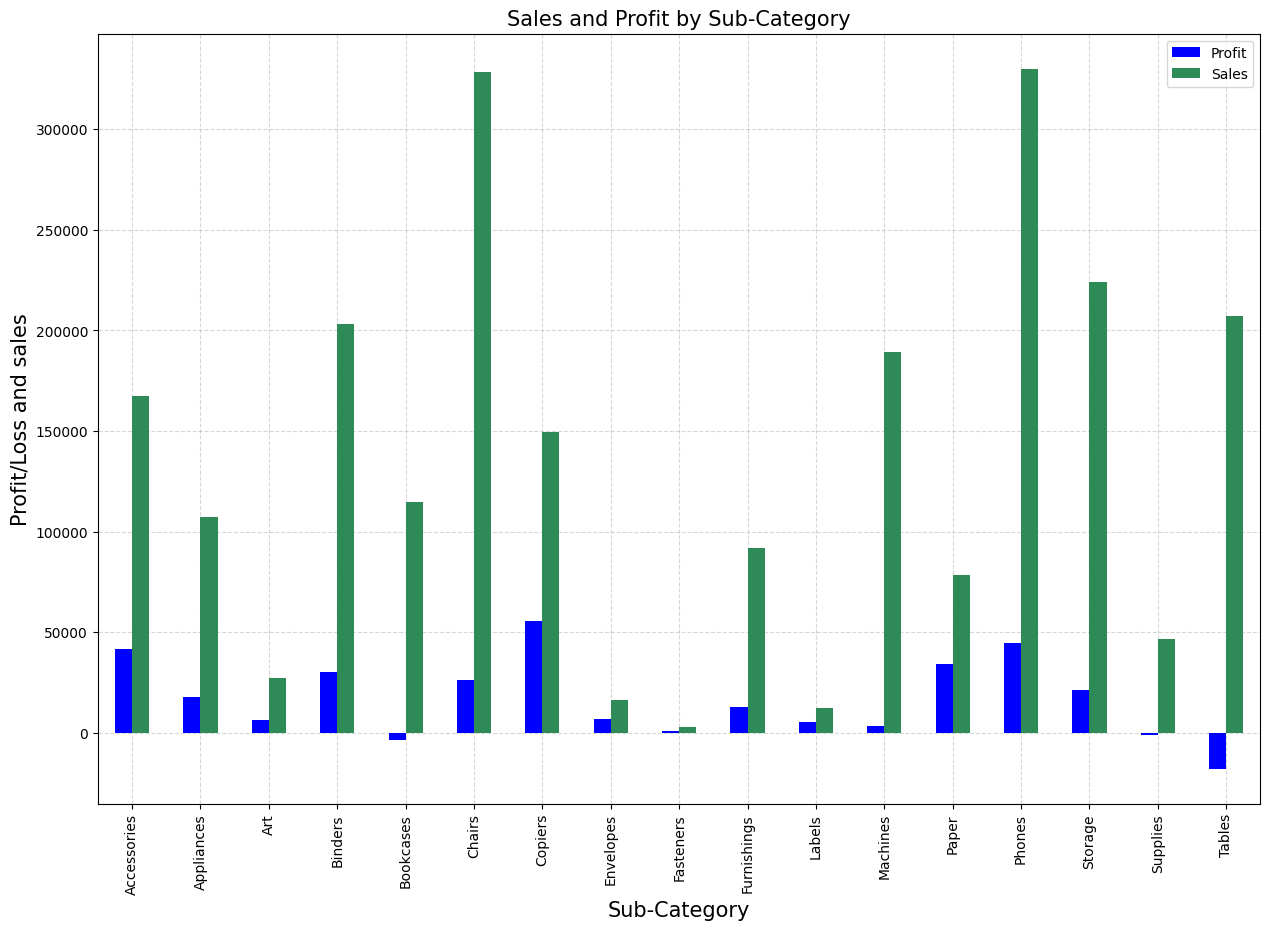

In [ ]:
SubCategory_profit_sales.plot(kind='bar', figsize=(15,10), color=['blue', 'seagreen']).set_xticklabels(SubCategory_profit_sales.index, rotation=90)
plt.grid(zorder=1, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.xlabel("Sub-Category", fontsize=15)
plt.ylabel("Profit/Loss and sales", fontsize=15)
plt.title('Sales and Profit by Sub-Category', fontsize=15)
plt.show()

#### **Ans#05:**
####  **For Category**
*   Technology and Office Supplies have high profit.
*   Furniture has less profit.

####  **For Sub-Category**
*   Phones sub-category have high sales.
*   chairs have high sales but less profit compared to phones.
*   Tables and Bookmarks sub-categories facing huge loss.